In [1]:
import pandas as pd
from collections import Counter
import time
import matplotlib.pyplot as plt
import csv
# from fruithut.fruithut import *
# from mushroom.mushroom import *
# from foodmart.foodmart import *
# from chess.chess import *
from demo_web.demo_web import *


In [2]:
# sample
# data = {
#     'Tid': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
#     'Items': [['a', 'c', 'd'],
#               ['a', 'b', 'd'],
#               ['b', 'c', 'd', 'e'],
#               ['a', 'd'],
#               ['c', 'd', 'e'],
#               ['a', 'b', 'c', 'd', 'e']]
# }
# df = pd.DataFrame(data)

# data = {
#     'Tid': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
#     'Items': [['apple', 'cherry', 'durian'],
#               ['apple', 'banana', 'durian'],
#               ['banana', 'cherry', 'durian', 'elderberry'],
#               ['apple', 'durian'],
#               ['cherry', 'durian', 'elderberry'],
#               ['apple', 'banana', 'cherry', 'durian', 'elderberry']]
# }

# df = pd.DataFrame(data)
df['Item_Length'] = df['Items'].apply(lambda items: len(items))
len_df = len(df)
df

,Tid,Items,Item_Length
0,T8,"[item11, item23, item25, item10, item12, item2...",9
1,T10,"[item23, item25, item26, item10, item24, item1...",10
2,T11,"[item11, item23, item25, item26, item10, item1...",10
3,T12,"[item11, item25, item26, item24, item12, item2...",9
4,T13,"[item11, item25, item26, item10, item24, item2...",9
...,...,...,...
122,T134,"[item10, item12]",2
123,T135,"[item23, item12, item24]",3
124,T136,[item23],1
125,T137,"[item13, item26, item28, item27]",4


In [3]:
unique_items = df['Items'].explode().unique().tolist() # get unique item => save to list
unique_items

['item11',
 'item23',
 'item25',
 'item10',
 'item12',
 'item24',
 'item28',
 'item27',
 'item13',
 'item26',
 'item14']

In [4]:
length_transaction = df["Items"].apply(len)
if length_transaction.nunique() == 1:
    hastheSameLengh = True
else:
    hastheSameLengh = False

hastheSameLengh

False

In [5]:
length_transaction = length_transaction.to_list()
length_transaction

[9,
 10,
 10,
 9,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 10,
 9,
 11,
 7,
 8,
 9,
 7,
 6,
 5,
 7,
 7,
 8,
 8,
 8,
 7,
 9,
 9,
 8,
 11,
 10,
 11,
 11,
 11,
 11,
 7,
 7,
 7,
 8,
 6,
 9,
 8,
 5,
 4,
 5,
 5,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 2,
 3,
 3,
 5,
 2,
 3,
 2,
 2,
 5,
 3,
 4,
 2,
 6,
 4,
 3,
 2,
 3,
 4,
 1,
 4,
 3,
 3,
 3,
 3,
 5,
 2,
 2,
 4,
 4,
 1,
 2,
 2,
 2,
 4,
 3,
 4,
 4,
 1,
 1,
 5,
 4,
 2,
 3,
 6,
 2,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 5,
 3,
 4,
 3,
 2,
 3,
 1,
 4,
 4]

In [6]:
# calculate stset: {'a': [T1, T2, T4, T6]} - list Tid containing unique item
def cal_stset(df):    
    df_unpivot = df.explode('Items')
    df_stset = df_unpivot.groupby('Items').agg({'Tid': [list], 'Item_Length': list}).reset_index()
    df_stset.columns = ['Items', 'StSet', 'Length_transaction']
    df_stset['Items'] = df_stset['Items'].apply(lambda x: [x])
    df_stset
    return df_stset 

In [7]:
# calculate support - count number of Tid containing unique item
def cal_support(df_stset):
    df_stset['Support'] = df_stset['StSet'].apply(len)
    return df_stset

In [8]:
start_time = time.time()
df_stset = cal_stset(df)
print(df_stset)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

       Items                                              StSet  \
0   [item10]  [T8, T10, T11, T13, T14, T18, T20, T21, T22, T...   
1   [item11]  [T8, T11, T12, T13, T14, T18, T21, T22, T23, T...   
2   [item12]  [T8, T10, T11, T12, T13, T14, T18, T19, T20, T...   
3   [item13]  [T8, T10, T11, T12, T13, T14, T18, T19, T20, T...   
4   [item14]  [T10, T11, T12, T13, T18, T19, T20, T21, T24, ...   
5   [item23]  [T8, T10, T11, T14, T18, T19, T20, T21, T22, T...   
6   [item24]  [T8, T10, T11, T12, T13, T14, T18, T19, T20, T...   
7   [item25]  [T8, T10, T11, T12, T13, T14, T18, T19, T20, T...   
8   [item26]  [T10, T11, T12, T13, T14, T18, T19, T20, T22, ...   
9   [item27]  [T8, T10, T11, T12, T14, T18, T19, T21, T22, T...   
10  [item28]  [T8, T10, T12, T13, T18, T19, T20, T21, T22, T...   

                                   Length_transaction  
0   [9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...  
1   [9, 10, 9, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11...  
2   [9, 10, 10, 9, 9, 9, 11

In [9]:
df_stset = cal_support(df_stset)
df_stset

,Items,StSet,Length_transaction,Support
0,[item10],"[T8, T10, T11, T13, T14, T18, T20, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",58
1,[item11],"[T8, T11, T12, T13, T14, T18, T21, T22, T23, T...","[9, 10, 9, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11...",59
2,[item12],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",61
3,[item13],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 11, 10, 11, ...",59
4,[item14],"[T10, T11, T12, T13, T18, T19, T20, T21, T24, ...","[10, 10, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11, ...",62
5,[item23],"[T8, T10, T11, T14, T18, T19, T20, T21, T22, T...","[9, 10, 10, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9, 1...",61
6,[item24],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10...",53
7,[item25],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",65
8,[item26],"[T10, T11, T12, T13, T14, T18, T19, T20, T22, ...","[10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",61
9,[item27],"[T8, T10, T11, T12, T14, T18, T19, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 11...",59


In [10]:
# ex: 'a': {'l(a)': [2, 3, 5], 'n(a)': [1, 2, 1]}
def df_prepare_UBO(df_stset):
    l_item_list = []
    n_item_list = []
    for index, row in df_stset.iterrows():
        item = row['Items']
        length_transaction = row['Length_transaction']

        l_item = sorted(set(length_transaction)) # get unique len(Tid) => sort ascending

        counter = Counter(length_transaction)
        n_item = [counter[i] for i in l_item] # count unique len(Tid) in occupancy_list => same index with l_item
        
        l_item_list.append(l_item)
        n_item_list.append(n_item)
    
    df_stset = df_stset.assign(l_item=l_item_list, n_item=n_item_list)
    return df_stset

In [11]:
# calculate occupancy - O(P) = ∑ T ∈ STSet(P) |P|/|T|
# |P|: len(unique item) itemset {a} =>1
# |T|: len(Tid) 1/3 + 1/3 + 1/2 + 1/5 
def cal_occupancy(df_stset):
    occupancy_data = []
    for index, row in df_stset.iterrows():
        item = row['Items']
        length_transaction = row['Length_transaction']
        total = 0
        for length in length_transaction:
            total += len(item) / length
        occupancy_data.append({'Items': item, 'Occupancy': round(total, 2)})
    
    df_occupancy = pd.DataFrame(occupancy_data)
    df_stset['Occupancy'] = df_occupancy['Occupancy']
    return df_stset

In [12]:
df_stset = cal_occupancy(df_stset)
df_stset

,Items,StSet,Length_transaction,Support,Occupancy
0,[item10],"[T8, T10, T11, T13, T14, T18, T20, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",58,10.09
1,[item11],"[T8, T11, T12, T13, T14, T18, T21, T22, T23, T...","[9, 10, 9, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11...",59,11.55
2,[item12],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",61,12.67
3,[item13],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 11, 10, 11, ...",59,11.86
4,[item14],"[T10, T11, T12, T13, T18, T19, T20, T21, T24, ...","[10, 10, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11, ...",62,11.93
5,[item23],"[T8, T10, T11, T14, T18, T19, T20, T21, T22, T...","[9, 10, 10, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9, 1...",61,12.41
6,[item24],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10...",53,8.55
7,[item25],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",65,12.97
8,[item26],"[T10, T11, T12, T13, T14, T18, T19, T20, T22, ...","[10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",61,11.61
9,[item27],"[T8, T10, T11, T12, T14, T18, T19, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 11...",59,11.10


In [13]:
# calculate according to the formula: ni x lx/li
def cal_ubo(l, n):
    total = 0
    for i in range(len(l)):
        total += n[i] * l[0] / l[i]
    return round(total, 2)

In [14]:
# summarize: ∑ni x lx/li => save to list 
def ubo_final(length, number_transaction):
    ubo = []
    for i in range(len(length)): 
        # ex: len = [2,3,5], num_trans = [1,2,1]
        # i = 0 => len = [2,3,5], num_trans = [1,2,1]
        # i = 1 => len = [3,5], num_trans = [2,1]
        # ...
        ubo.append(cal_ubo(length[i:], number_transaction[i:])) # save result cal_ubo for each i => get maxUBO
    return ubo

In [15]:
# get max from summarize => save max value in UBO by key
def calculate_maxUBO(df_UBO):
    df_UBO['List_UBO'] = None # create new column
    df_UBO['Max_UBO'] = None # create new column
    for index, row in df_UBO.iterrows():
        length = row['l_item'] #get list of len(Tid) containing unique item
        number_transaction = row['n_item'] # count unique len(Tid) in occupancy_list
        
        ubo = ubo_final(length, number_transaction) # get list of UBO by i. ex: [2.73, 2.6, 1.0]
        max_ubo = max(ubo) # max list of UBO
        
        df_UBO.at[index, 'List_UBO'] = ubo # save result in df
        df_UBO.at[index, 'Max_UBO'] = max_ubo # save result in df
        
    return df_UBO

In [16]:
# UBO calculation methods: main function
def cal_UBO(df_stset): 
    df_stset = df_prepare_UBO(df_stset)    
    df_stset = calculate_maxUBO(df_stset)
    return df_stset

In [17]:
df_stset = cal_UBO(df_stset)
df_stset

,Items,StSet,Length_transaction,Support,Occupancy,l_item,n_item,List_UBO,Max_UBO
0,[item10],"[T8, T10, T11, T13, T14, T18, T20, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",58,10.09,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[2, 4, 10, 4, 3, 7, 4, 12, 4, 8]","[20.19, 27.28, 31.04, 26.3, 26.76, 27.72, 23.6...",31.04
1,[item11],"[T8, T11, T12, T13, T14, T18, T21, T22, T23, T...","[9, 10, 9, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11...",59,11.55,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[6, 4, 8, 6, 2, 4, 6, 12, 3, 8]","[23.1, 25.65, 28.86, 26.08, 24.09, 25.77, 24.8...",28.86
2,[item12],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",61,12.67,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 5, 6, 10, 3, 2, 3, 5, 14, 4, 8]","[12.67, 23.34, 27.51, 28.68, 23.35, 24.42, 26....",28.68
3,[item13],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 11, 10, 11, ...",59,11.86,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 3, 6, 9, 6, 2, 5, 5, 10, 4, 8]","[11.86, 21.72, 28.08, 29.44, 25.56, 23.47, 25....",29.44
4,[item14],"[T10, T11, T12, T13, T18, T19, T20, T21, T24, ...","[10, 10, 9, 9, 11, 9, 9, 9, 9, 11, 10, 9, 11, ...",62,11.93,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 2, 4, 12, 8, 1, 6, 5, 11, 4, 8]","[11.93, 21.86, 29.79, 34.39, 27.99, 23.99, 26....",34.39
5,[item23],"[T8, T10, T11, T14, T18, T19, T20, T21, T22, T...","[9, 10, 10, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9, 1...",61,12.41,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 3, 7, 10, 5, 3, 5, 5, 10, 4, 8]","[12.41, 22.82, 29.73, 30.31, 25.39, 24.47, 25....",30.31
6,[item24],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10...",53,8.55,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 5, 5, 4, 2, 4, 6, 14, 4, 8]","[17.11, 24.16, 25.55, 25.69, 26.03, 28.03, 27....",28.03
7,[item25],"[T8, T10, T11, T12, T13, T14, T18, T19, T20, T...","[9, 10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11,...",65,12.97,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[2, 2, 5, 11, 3, 3, 7, 7, 14, 3, 8]","[12.97, 21.95, 29.92, 33.23, 27.79, 29.75, 31....",33.23
8,[item26],"[T10, T11, T12, T13, T14, T18, T19, T20, T22, ...","[10, 10, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 10, 9...",61,11.61,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[5, 5, 8, 6, 2, 5, 5, 13, 4, 8]","[23.22, 27.33, 29.78, 27.22, 25.47, 27.38, 25....",29.78
9,[item27],"[T8, T10, T11, T12, T14, T18, T19, T21, T22, T...","[9, 10, 10, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 11...",59,11.10,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[3, 7, 9, 5, 2, 5, 4, 13, 3, 8]","[22.21, 28.81, 29.08, 25.1, 24.12, 25.8, 23.77...",29.08


In [18]:
def mine_hoi_1_itemset(threshold, hastheSameLengh, df_stset):
    C1 = []
    HOI1 = []
    for index, row in df_stset.iterrows():
        item = row['Items'] # 1-itemset in row
        support = row['Support'] # support of 1-itemset
        occupancy = row['Occupancy'] # occuopancy of 1-itemset
        max_ubo = row['Max_UBO'] # max_ubo of 1-itemset
        
        if support >= threshold:
            if hastheSameLengh is False:
                if max_ubo > threshold:
                    C1.append(item)
                    if occupancy >= threshold:
                        HOI1.append(item)
            else:
                C1.append(item)
                if occupancy >= threshold:
                    HOI1.append(item)
    
    return C1, HOI1

In [19]:
def df_intersection(items1, items2, df_stset):    
    df_intersection = pd.DataFrame(columns=['Items', 'StSet'])
    # set1 = set(items1)
    # set2 = set(items2)
    list_item = list(set(items1) | set(items2))
    
    list_occupancy_item = []
    
    for i in list_item:
        list_occupancy_item.append(df_stset[df_stset['Items'].apply(lambda item: i in item)]["StSet"].iloc[0])
        
    intersection_list = set(list_occupancy_item[0])
    for sublist in list_occupancy_item[1:]:
        intersection_list = intersection_list.intersection(sublist)
    
    df_intersection = df_intersection.append({'Items': list_item, 'StSet': intersection_list}, ignore_index=True)
    df_intersection['Length_transaction'] = df_intersection['StSet'].apply(lambda x: sorted([len(df[df['Tid'] == tid]['Items'].iloc[0]) for tid in x]))
    
    # list_length = df_intersection['StSet'].apply(lambda x: [len(df[df['Tid'] == tid]['Items'].iloc[0]) for tid in x]).iloc[0]
    # sort_data = sorted(zip(intersection_list, list_length))
    
    return df_intersection

In [20]:
# test1 = ['c']
# test2 = ['d']
# df_intersection(test1, test2, df_stset)

In [21]:
def is_same_equivalence_class(P1, P2):
    if len(P1) == len(P2):
        if len(P1) == 1:
            if P1 == P2:
                return False
            else:
                return True
        else:
            if P1 == P2:
                return False
            else:
                new_P1 = P1[:-1] 
                new_P2 = P2[:-1]
                if new_P1 == new_P2:
                    return True
                else:
                    return False
    else:
        return False
        # else:
        #     intersection_P1_P2 = sorted(list(set(P1) & set(P2)))
        #     print(intersection_P1_P2)
        #     if len(intersection_P1_P2) == len(P1) - 1:
        #         for element in intersection_P1_P2:
        #             if P1.index(element) != P2.index(element):
        #                 return False
        #         return True
        #     else:
        #         return False

In [22]:
# test1 = ['a']
# test2 = ['b']
# print(is_same_equivalence_class(test1, test2))

In [23]:
def cal_occupancy_candidate(items):    
    df_candidate = pd.DataFrame(columns=['Items', 'StSet'])
    
    list_stset_item = []
    
    for i in items:
        list_stset_item.append(df_stset[df_stset['Items'].apply(lambda item: i in item)]["StSet"].iloc[0])
        
    intersection_list = set(list_stset_item[0])
    for sublist in list_stset_item[1:]:
        intersection_list = intersection_list.intersection(sublist)
    
    intersection_list = sorted(intersection_list, key = lambda x: x[0])
    
    df_candidate = df_candidate.append({'Items': items, 'StSet': intersection_list}, ignore_index=True)
    df_candidate['Length_transaction'] = df_candidate['StSet'].apply(lambda x: [len(df[df['Tid'] == tid]['Items'].iloc[0]) for tid in x])
    df_candidate = cal_occupancy(df_candidate)
    return df_candidate
    

In [24]:
# test = ['a','b','d']
# df_test = cal_occupancy_candidate(test)['Occupancy'].iloc[0]
# print(df_test)

In [25]:
def mine_hoi_k_itemset(threshold, hastheSameLengh, CK_minus_1, df_stset):
    CK = []
    HOIK = []
    
    while len(CK_minus_1) > 0:
        # P1 = sorted(CK_minus_1[0])
        P1 = CK_minus_1[0]
        for P2 in CK_minus_1:
            if is_same_equivalence_class(P1, P2):
                P = df_intersection(P1, P2, df_stset)
                P_items = P['Items'].iloc[0]
                P_stset = P['StSet'].iloc[0]
                if len(P_stset) >= threshold:
                    if hastheSameLengh is False:
                        P_ubo = cal_UBO(P)['Max_UBO'].iloc[0]
                        if P_ubo >= threshold:
                            CK.append(P_items)
                    else:
                        CK.append(P_items)
                continue

        CK_minus_1.pop(0)
    
    for i in CK:
        if cal_occupancy_candidate(i)['Occupancy'].iloc[0] >= threshold:
            HOIK.append(i)
            
    return CK, HOIK
        
                        
    

In [26]:
def mine_depth_hois(threshold, hastheSameLengh, C1, df_stset, HOIS):
    if len(C1) == 0:
        return HOIS
    
    for i in range(len(C1)):
        P1 = C1[i]
        C_l = []
        for j in range(i + 1, len(C1)):
            P2 = C1[j]
            P = df_intersection(P1, P2, df_stset)
            P_items = P['Items'].iloc[0]
            P_stset = P['StSet'].iloc[0]
            if len(P_stset) >= threshold:
                if hastheSameLengh is False:
                    P_ubo = cal_UBO(P)['Max_UBO'].iloc[0]
                    if P_ubo >= threshold:
                        C_l.append(P_items)
                else:
                    C_l.append(P_items)

        mine_depth_hois(threshold, hastheSameLengh, C_l, df_stset, HOIS)
        
        for i in C_l:
            if cal_occupancy_candidate(i)['Occupancy'].iloc[0] >= threshold:
                HOIS.append(i)
    
    # return HOIS
        
                        

In [27]:
#test FHOI
def test_fhoi(threshold_list):
    start_time = time.time()
    execution_time_list = []
    len_itemset_list = []
    HOIS_list = []
    for threshold_percent in threshold_list:
        HOIS = []
        C1 = []
        HOI1 = []
        CK_minus_1 = []

        k = 2 # loop to create 2-itemset
        threshold = threshold_percent * len_df # ex: threshold = 25% of len(database)
        start_time = time.time()

        #create candidate 1 and HOI1 itemset
        C1, HOI1 = mine_hoi_1_itemset(threshold, hastheSameLengh, df_stset)
        HOIS = HOI1
        CK_minus_1 = C1

        while CK_minus_1:
            CK, HOIK = mine_hoi_k_itemset(threshold, hastheSameLengh, CK_minus_1, df_stset)
            if HOIK:
                for i in HOIK:
                    HOIS.append(i)
                CK_minus_1 = CK
                k += 1
            else:
                continue

        for i in HOIS:
            print(i)

        end_time = time.time()
        execution_time = end_time - start_time
        print("Threshold: " + str(threshold_percent))
        print("Length HOI: " + str(len(HOIS)))
        print(f"Execution time: {execution_time} seconds")
        print("--------------------")
        len_itemset_list.append(len(HOIS))
        execution_time_list.append(execution_time)
        HOIS_list.append(HOIS)
    return len_itemset_list, execution_time_list, HOIS_list



In [28]:
#test DFHOI
def test_dfhoi(threshold_list):
    start_time = time.time()


    execution_time_list = []
    len_itemset_list = []
    HOIS_list = []
    for threshold_percent in threshold_list:
        HOIS = []
        C1 = []
        HOI1 = []

        # threshold_percent = i
        threshold = threshold_percent * len_df # ex: threshold = 25% of len(database)

        #create candidate 1 and HOI1 itemset
        C1, HOI1 = mine_hoi_1_itemset(threshold, hastheSameLengh, df_stset)
        HOIS = HOI1
        
        HOIS.append(mine_depth_hois(threshold, hastheSameLengh, C1, df_stset, HOIS))
        HOIS = list(filter(lambda x: x is not None, HOIS))
        
        for i in HOIS:
            print(i)
            
        end_time = time.time()
        execution_time = end_time - start_time
        print("Threshold: " + str(threshold_percent))
        print("Length HOI: " + str(len(HOIS)))
        print(f"Execution time: {execution_time} seconds")
        print("--------------------")
        len_itemset_list.append(len(HOIS))
        execution_time_list.append(execution_time)
        HOIS_list.append(HOIS)
    return len_itemset_list, execution_time_list, HOIS_list


In [29]:
threshold_list_fhoi = [0.08, 0.085, 0.09, 0.095, 0.1, 0.15, 0.2]
len_itemset_fhoi_list, execution_time_fhoi_list, HOIS_fhoi_list = test_fhoi(threshold_list_fhoi)

['item11']
['item12']
['item13']
['item14']
['item23']
['item25']
['item26']
['item27']
['item28']
['item10', 'item12']
['item10', 'item23']
['item10', 'item25']
['item11', 'item12']
['item11', 'item25']
['item11', 'item27']
['item12', 'item25']
['item14', 'item13']
['item13', 'item28']
['item14', 'item25']
['item14', 'item27']
['item14', 'item28']
['item23', 'item24']
['item23', 'item25']
['item23', 'item26']
['item28', 'item25']
['item26', 'item28']
['item10', 'item11', 'item27']
['item10', 'item12', 'item25']
['item10', 'item23', 'item25']
['item11', 'item12', 'item25']
['item11', 'item27', 'item25']
['item14', 'item12', 'item25']
['item12', 'item28', 'item25']
['item26', 'item12', 'item25']
['item14', 'item23', 'item24']
['item14', 'item26', 'item24']
['item26', 'item28', 'item25']
['item10', 'item11', 'item27', 'item25']
['item10', 'item23', 'item12', 'item25']
['item10', 'item12', 'item28', 'item25']
['item10', 'item12', 'item25', 'item14']
['item10', 'item23', 'item27', 'item25'

In [30]:
threshold_list_dfhoi = [0.08, 0.085, 0.09, 0.095, 0.1, 0.15, 0.2]
len_itemset_dfhoi_list, execution_time_dfhoi_list, HOIS_dfhoi_list = test_dfhoi(threshold_list_dfhoi)

['item11']
['item12']
['item13']
['item14']
['item23']
['item25']
['item26']
['item27']
['item28']
['item10', 'item11', 'item27', 'item25']
['item10', 'item11', 'item27']
['item25', 'item26', 'item10', 'item12', 'item24', 'item14', 'item13']
['item10', 'item12', 'item25', 'item14']
['item10', 'item23', 'item12', 'item25']
['item10', 'item12', 'item28', 'item25']
['item10', 'item12', 'item25']
['item23', 'item25', 'item26', 'item10', 'item24', 'item27']
['item10', 'item23', 'item27', 'item25']
['item10', 'item23', 'item25']
['item10', 'item12']
['item10', 'item23']
['item10', 'item25']
['item11', 'item25', 'item26', 'item12', 'item24', 'item13']
['item11', 'item25', 'item26', 'item12', 'item24']
['item11', 'item25', 'item12', 'item24', 'item27']
['item11', 'item12', 'item24', 'item25']
['item11', 'item25', 'item26', 'item12', 'item28']
['item11', 'item12', 'item27', 'item25']
['item11', 'item12', 'item28', 'item25']
['item11', 'item12', 'item25']
['item11', 'item26', 'item14', 'item13']

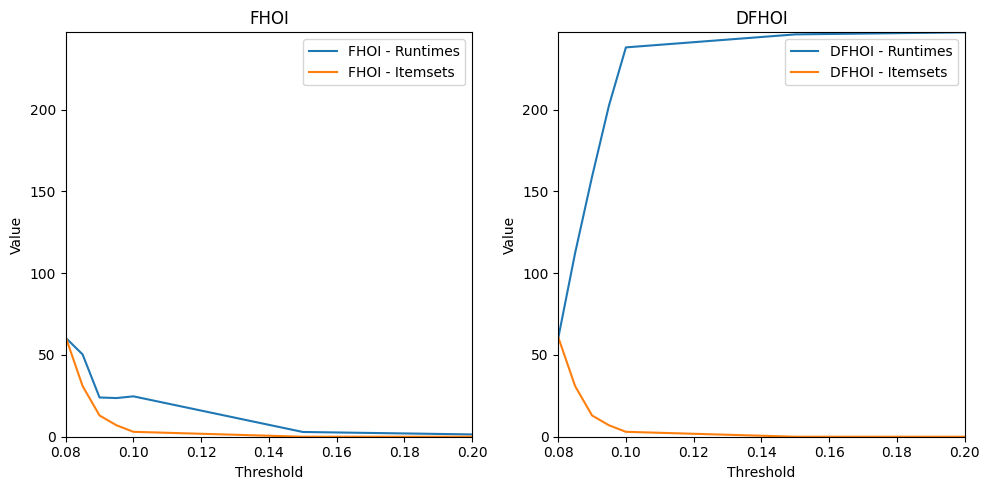

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#fhoi
ax1.plot(threshold_list_fhoi, execution_time_fhoi_list, label='FHOI - Runtimes')
ax1.plot(threshold_list_fhoi, len_itemset_fhoi_list, label='FHOI - Itemsets')
ax1.set_title('FHOI')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Value')
ax1.legend()

#dfhoi
ax2.plot(threshold_list_dfhoi, execution_time_dfhoi_list, label='DFHOI - Runtimes')
ax2.plot(threshold_list_dfhoi, len_itemset_dfhoi_list, label='DFHOI - Itemsets')
ax2.set_title('DFHOI')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Value')
ax2.legend()

min_x = min(min(threshold_list_fhoi), min(threshold_list_dfhoi))
max_x = max(max(threshold_list_fhoi), max(threshold_list_dfhoi))
min_y = min(min(execution_time_fhoi_list), min(len_itemset_fhoi_list), min(execution_time_dfhoi_list), min(len_itemset_dfhoi_list))
max_y = max(max(execution_time_fhoi_list), max(len_itemset_fhoi_list), max(execution_time_dfhoi_list), max(len_itemset_dfhoi_list))
ax1.set_xlim(min_x, max_x)
ax1.set_ylim(min_y, max_y)
ax2.set_xlim(min_x, max_x)
ax2.set_ylim(min_y, max_y)

plt.tight_layout()
plt.show()

In [32]:

demo_dfhoi = HOIS_dfhoi_list[0]
df_demo_dfhoi = pd.DataFrame({'Items': demo_dfhoi})

with open(r"E:\demo_web.csv", "w") as f:
    for row in demo_dfhoi:
        f.write("%s\n" % ','.join(str(col) for col in row))